In [ ]:
# STEP 1: Install required libraries
!pip install pandas scikit-learn

# STEP 2: Import libraries
import pandas as pd
import random
from sklearn.preprocessing import LabelEncoder

# STEP 3: Sentence templates per topic
import itertools

topic_templates = {
    "Material and Technical Conditions": [
        "The internet connection was {quality} during remote learning.",
        "Students had {access} to computers at home.",
        "The digital platforms used were {platform_quality}.",
        "Technical support was {support_quality}.",
        "Parents reported {difficulty} managing the tech setup."
    ],
    "Educational Dimension": [
        "The quality of teaching was {quality_level} in online classes.",
        "There was {interaction_level} interaction between teachers and students.",
        "Assignments were {assignment_quality} for the students.",
        "Teachers {teacher_support} digital resources.",
        "Remote lessons were {structure_level} and hard to follow."
    ],
    "Psychological–Emotional Dimension": [
        "Students felt {emotion_state} during online school.",
        "There was {availability} of emotional support.",
        "The isolation {impact} the children's well-being.",
        "Parents noticed {behavior_change} in their children.",
        "Children were {motivation_level} to attend remote classes."
    ],
    "Learning Difficulties and Emergency Remote Teaching": [
        "Students with ADHD found it {difficulty_level} to focus online.",
        "There was {support_level} support for students with special needs.",
        "Learning materials were {material_suitability} for diverse learners.",
        "Teachers were {teacher_confidence} in supporting learning difficulties.",
        "Remote classes made it {challenge_degree} for children with dyslexia."
    ]
}

# Word options for template filling
fill_options = {
    "quality": ["unreliable", "very poor", "adequate", "excellent"],
    "access": ["limited", "full", "no", "shared"],
    "platform_quality": ["buggy", "user-friendly", "outdated", "fast"],
    "support_quality": ["nonexistent", "helpful", "slow", "efficient"],
    "difficulty": ["significant difficulty", "minor difficulty", "no issue", "a learning curve"],

    "quality_level": ["excellent", "poor", "inconsistent", "good"],
    "interaction_level": ["limited", "regular", "extensive", "minimal"],
    "assignment_quality": ["confusing", "clear", "unmanageable", "straightforward"],
    "teacher_support": ["struggled to use", "easily used", "received no training for", "were trained on"],
    "structure_level": ["well-organized", "disorganized", "difficult", "manageable"],

    "emotion_state": ["anxious", "lonely", "demotivated", "overwhelmed"],
    "availability": ["no", "some", "full", "insufficient"],
    "impact": ["seriously affected", "somewhat affected", "not affected", "negatively impacted"],
    "behavior_change": ["increased frustration", "withdrawal", "improved focus", "emotional outbursts"],
    "motivation_level": ["unmotivated", "excited", "neutral", "reluctant"],

    "difficulty_level": ["very hard", "impossible", "challenging", "manageable"],
    "support_level": ["adequate", "limited", "no", "strong"],
    "material_suitability": ["inaccessible", "tailored", "poorly adapted", "well-designed"],
    "teacher_confidence": ["uncertain", "confident", "hesitant", "experienced"],
    "challenge_degree": ["more difficult", "extremely challenging", "a struggle", "easy"]
}

# STEP 4: Generate expanded dataset
def generate_sentences(template_list, fill_dict, n=100):
    data = []
    while len(data) < n:
        for template in template_list:
            values = {
                k: random.choice(v)
                for k, v in fill_dict.items()
                if "{" + k + "}" in template
            }
            sentence = template.format(**values)
            data.append(sentence)
            if len(data) >= n:
                break
    return data

# STEP 5: Create dataset with balanced classes
data = []
n_samples_per_class = 120

for topic, templates in topic_templates.items():
    sentences = generate_sentences(templates, fill_options, n_samples_per_class)
    for sentence in sentences:
        data.append({"text": sentence, "label": topic})

random.shuffle(data)
df = pd.DataFrame(data)

# STEP 6: Encode labels
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])

# STEP 7: Save to CSV
df.to_csv("large_ERT_dataset_english.csv", index=False)

# Preview
df.head()

from google.colab import files
files.download("large_ERT_dataset_english.csv")


ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Install and Import XGBoost

In [ ]:
!pip install transformers scikit-learn pandas numpy sentencepiece datasets

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

!pip install --upgrade transformers datasets


In [ ]:
# Load and prepare dataset
df = pd.read_csv('/large_ERT_dataset_english.csv')  # Replace with your dataset
df = df[['text', 'label']]

# Encode labels
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])

# Split data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], df['encoded_label'], test_size=0.2, random_state=42
)

def print_evaluation(y_true, y_pred):
    print(classification_report(y_true, y_pred, zero_division=0))


#MODEL 1: XGBoost (TF-IDF)

In [ ]:
# Preprocess
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Train
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, train_labels)

# Predict and Evaluate
xgb_preds = xgb_model.predict(X_test)

print("📘 XGBoost Results:")
print_evaluation(test_labels, xgb_preds)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:55:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📘 XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        25

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



MODEL 2: mBERT

In [ ]:
#STEP 1: Setup and Import
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.optim import AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from tqdm import tqdm

# STEP 2: Custom Dataset
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts.tolist()
        self.labels = labels.tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        inputs = self.tokenizer(
            self.texts[idx],
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt"
        )
        input_ids = inputs['input_ids'].squeeze(0)
        attention_mask = inputs['attention_mask'].squeeze(0)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'label': label}

# STEP 3: Load Tokenizer and Model
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(le.classes_))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# STEP 4: Dataset Preparation
train_dataset = TextDataset(train_texts, train_labels, tokenizer)
test_dataset = TextDataset(test_texts, test_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# STEP 5: Training
optimizer = AdamW(model.parameters(), lr=5e-5)
model.train()

for epoch in range(3):  # number of epochs
    print(f"\nEpoch {epoch+1}")
    total_loss = 0
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    print(f"Average loss: {total_loss / len(train_loader):.4f}")

# STEP 6: Evaluation
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

print("\n📘 mBERT Evaluation Results:")
print(classification_report(true_labels, predictions, zero_division=0))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1


100%|██████████| 48/48 [10:10<00:00, 12.72s/it]


Average loss: 0.4857

Epoch 2


100%|██████████| 48/48 [09:29<00:00, 11.85s/it]


Average loss: 0.0108

Epoch 3


100%|██████████| 48/48 [09:29<00:00, 11.87s/it]


Average loss: 0.0056

📘 mBERT Evaluation Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        25

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



MODEL 3: XLM-R Greek

In [ ]:
# STEP 1: Install required libraries
!pip install transformers datasets --quiet

# STEP 2: Imports
import torch
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from tqdm import tqdm

# STEP 3: Load your dataset (replace this with your real CSV)
df = pd.read_csv("/large_ERT_dataset_english.csv")  # Should have 'text' and 'label' columns

# STEP 4: Encode labels
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])

# Split into train/test
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], df['encoded_label'], test_size=0.2, random_state=42
)

# STEP 5: Define custom dataset
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts.tolist()
        self.labels = labels.tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        inputs = self.tokenizer(
            self.texts[idx],
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0),
            'label': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# STEP 6: Load model and tokenizer
model_name = "xlm-roberta-base"  # multilingual model with Greek support
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(le.classes_))

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Dataloaders
train_dataset = TextDataset(train_texts, train_labels, tokenizer)
test_dataset = TextDataset(test_texts, test_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# STEP 7: Train the model
optimizer = AdamW(model.parameters(), lr=5e-5)
model.train()

for epoch in range(3):  # epochs
    print(f"\nEpoch {epoch+1}")
    total_loss = 0
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Average loss: {total_loss / len(train_loader):.4f}")

# STEP 8: Evaluate
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, axis=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("\n📘 XLM-R Evaluation Results:")
print(classification_report(all_labels, all_preds, zero_division=0))


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1


100%|██████████| 48/48 [11:07<00:00, 13.91s/it]


Average loss: 0.9797

Epoch 2


100%|██████████| 48/48 [11:04<00:00, 13.84s/it]


Average loss: 0.0329

Epoch 3


100%|██████████| 48/48 [10:56<00:00, 13.68s/it]


Average loss: 0.0072

📘 XLM-R Evaluation Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        25

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



MODEL 4: GreekBERT

In [ ]:
# STEP 1: Install required libraries
!pip install -q transformers datasets

# STEP 2: Disable W&B (this avoids any login prompt)
import os
os.environ["WANDB_DISABLED"] = "true"

# STEP 3: Import modules
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments
)

# STEP 4: Load dataset (make sure this file exists in your Colab)
df = pd.read_csv("/large_ERT_dataset_english.csv")  # Must have 'text' and 'label'

# STEP 5: Encode class labels
le = LabelEncoder()
df['label_id'] = le.fit_transform(df['label'])

# STEP 6: Train/Test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], df['label_id'], test_size=0.2, random_state=42
)

# STEP 7: Convert to Hugging Face Datasets
train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
test_dataset = Dataset.from_dict({'text': test_texts.tolist(), 'label': test_labels.tolist()})

# STEP 8: Tokenization
model_name = "bert-base-multilingual-cased"  # ✅ Public model, Greek-compatible
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# STEP 9: Load model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(le.classes_))

# STEP 10: TrainingArguments (no wandb, no evaluation_strategy)
training_args = TrainingArguments(
    output_dir="./mb_model_output",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="no"
)

# STEP 11: Define Trainer (W&B now disabled)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# STEP 12: Train model
trainer.train()

# STEP 13: Evaluate
preds_output = trainer.predict(test_dataset)
preds = np.argmax(preds_output.predictions, axis=1)

print("📘 Final Evaluation — mBERT (W&B disabled):")
print(classification_report(test_labels, preds, zero_division=0))


Map:   0%|          | 0/384 [00:00<?, ? examples/s]

Map:   0%|          | 0/96 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
10,1.374700
20,0.848500
30,0.410100
40,0.127700
50,0.028600
60,0.011300
70,0.006800
80,0.005100
90,0.004300
100,0.003800


📘 Final Evaluation — mBERT (W&B disabled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        25

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



Logical regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load dataset
df = pd.read_csv("large_ERT_dataset_english.csv")

# Step 2: Encode labels as numeric categories
df['encoded_label'] = df['label'].astype('category').cat.codes
label_names = df[['label', 'encoded_label']].drop_duplicates().sort_values('encoded_label')['label'].values

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['encoded_label'], test_size=0.2, random_state=42)

# Step 4: Vectorize text with TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Train Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)

# Step 6: Predict and evaluate
y_pred = lr_model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_names, zero_division=0))


Accuracy: 1.0

Classification Report:
                                                     precision    recall  f1-score   support

                              Educational Dimension       1.00      1.00      1.00        25
Learning Difficulties and Emergency Remote Teaching       1.00      1.00      1.00        25
                  Material and Technical Conditions       1.00      1.00      1.00        21
                  Psychological–Emotional Dimension       1.00      1.00      1.00        25

                                           accuracy                           1.00        96
                                          macro avg       1.00      1.00      1.00        96
                                       weighted avg       1.00      1.00      1.00        96



 Material and Methods fig 1,2,3


Material and Methods fig 1 & table 1

Table: Sample Distribution by Topic



,Count,Percentage (%)
label,,
Material and Technical Conditions,120,25.0
Psychological–Emotional Dimension,120,25.0
Educational Dimension,120,25.0
Learning Difficulties and Emergency Remote Teaching,120,25.0


<ipython-input-26-79beda318dca>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=summary_df.index, x='Count', data=summary_df, palette="viridis")


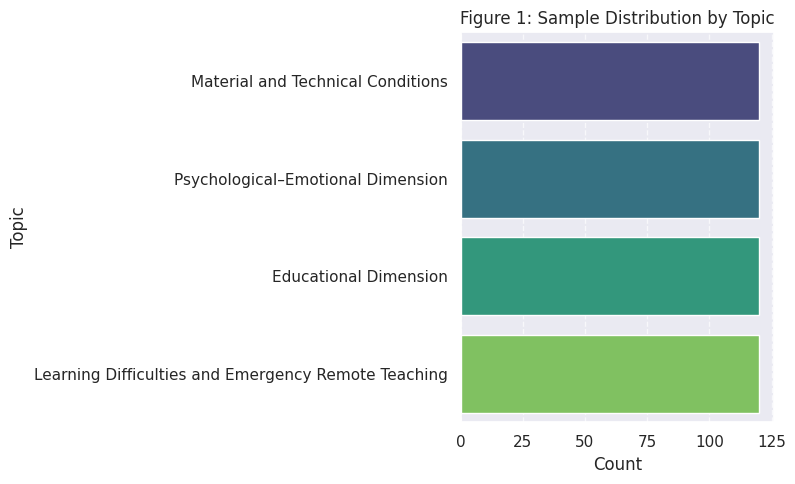

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("large_ERT_dataset_english.csv")

# Calculate counts and percentages
counts = df['label'].value_counts()
percentages = 100 * counts / counts.sum()
summary_df = pd.DataFrame({
    'Count': counts,
    'Percentage (%)': percentages.round(2)
}).sort_values(by='Count', ascending=True)  # ascending for horizontal bar order

# Step 1: Display summary table
print("Table: Sample Distribution by Topic\n")
display(summary_df)

# Step 2: Blank line for spacing
print("\n")

# Step 3: Plot Figure 1 horizontal bar chart
plt.figure(figsize=(8, 5))
sns.barplot(y=summary_df.index, x='Count', data=summary_df, palette="viridis")
plt.title("Figure 1: Sample Distribution by Topic")
plt.xlabel("Count")
plt.ylabel("Topic")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Material and Methods fig 2

Table 2: Top 5 Most Frequent Words per Topic



,Material and Technical Conditions,Psychological–Emotional Dimension,Educational Dimension,Learning Difficulties and Emergency Remote Teaching
learning,28,0,0,48
parents,24,0,0,0
reported,24,0,0,0
managing,24,0,0,0
tech,24,0,0,0
children,0,48,0,0
emotional,0,30,0,0
isolation,0,24,0,0
childrens,0,24,0,0
wellbeing,0,24,0,0



--------------------------------------------------------------------------------



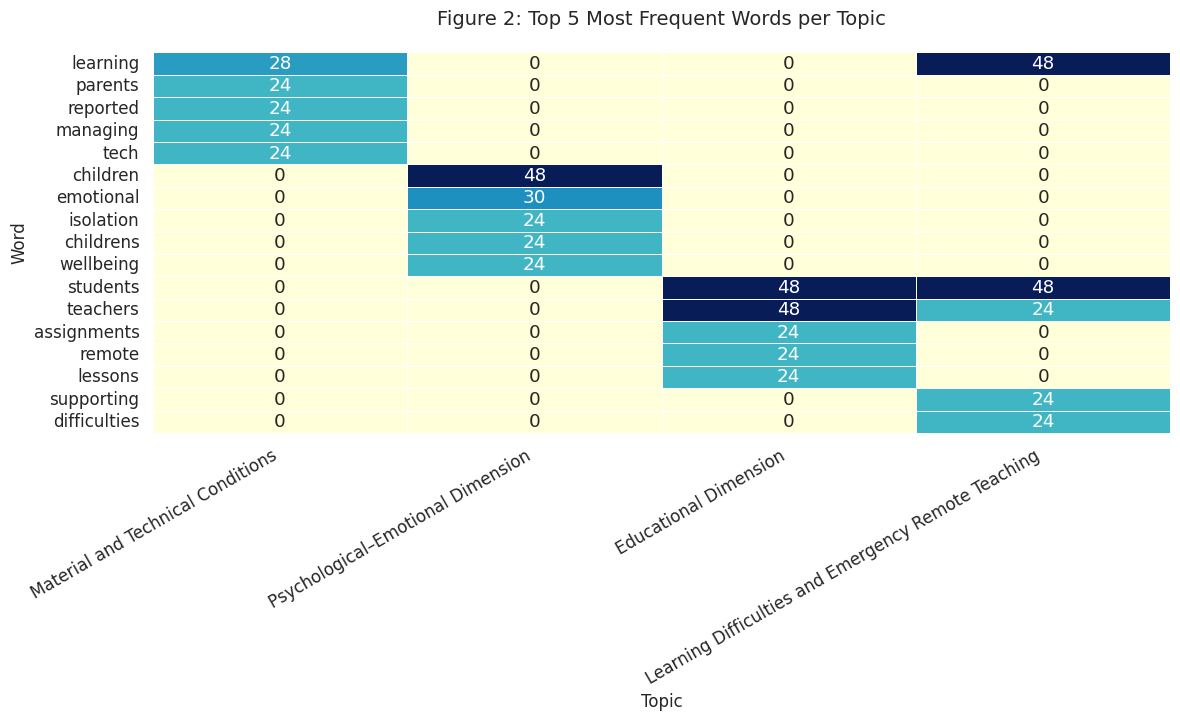

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import string

# Load your dataset if not loaded
df = pd.read_csv("large_ERT_dataset_english.csv")

# Simple tokenizer to clean and split text
def tokenize_and_clean(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    stopwords = set([
        "the", "and", "to", "was", "of", "in", "for", "a", "it", "on", "is", "with",
        "that", "there", "no", "not", "were", "had", "as", "at", "an", "be", "by", "or",
        "but", "from", "this", "they", "their", "too", "very", "all", "some"
    ])
    return [word for word in tokens if word.isalpha() and word not in stopwords]

# Collect top 5 words and counts per topic
top_words = {}
for label in df['label'].unique():
    texts = df[df['label'] == label]['text']
    all_words = []
    for sentence in texts:
        all_words.extend(tokenize_and_clean(sentence))
    common = Counter(all_words).most_common(5)
    top_words[label] = dict(common)

# Create Table 2: DataFrame showing top words with counts per topic
table2_df = pd.DataFrame(top_words).fillna(0).astype(int)
print("Table 2: Top 5 Most Frequent Words per Topic\n")
display(table2_df)

# Now plot Figure 2: Heatmap of top word counts
num_rows = table2_df.shape[0]

# Calculate figure height to add space (~0.5cm per row)
fig_height = num_rows * 0.4 + 1  # 0.4 inch per row plus padding

plt.figure(figsize=(12, fig_height))
sns.set(font_scale=1.1)
ax = sns.heatmap(
    table2_df,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='white',
    cbar=False
)
print("\n" + "-"*80 + "\n")

plt.title("Figure 2: Top 5 Most Frequent Words per Topic", fontsize=14, pad=20)
plt.ylabel("Word", fontsize=12)
plt.xlabel("Topic", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Material and Methods fig 3

Table 3: Confusion Matrix Counts



,Predicted: Educational Dimension,Predicted: Learning Difficulties and Emergency Remote Teaching,Predicted: Material and Technical Conditions,Predicted: Psychological–Emotional Dimension
Actual: Educational Dimension,25,0,0,0
Actual: Learning Difficulties and Emergency Remote Teaching,0,25,0,0
Actual: Material and Technical Conditions,0,0,21,0
Actual: Psychological–Emotional Dimension,0,0,0,25



--------------------------------------------------------------------------------



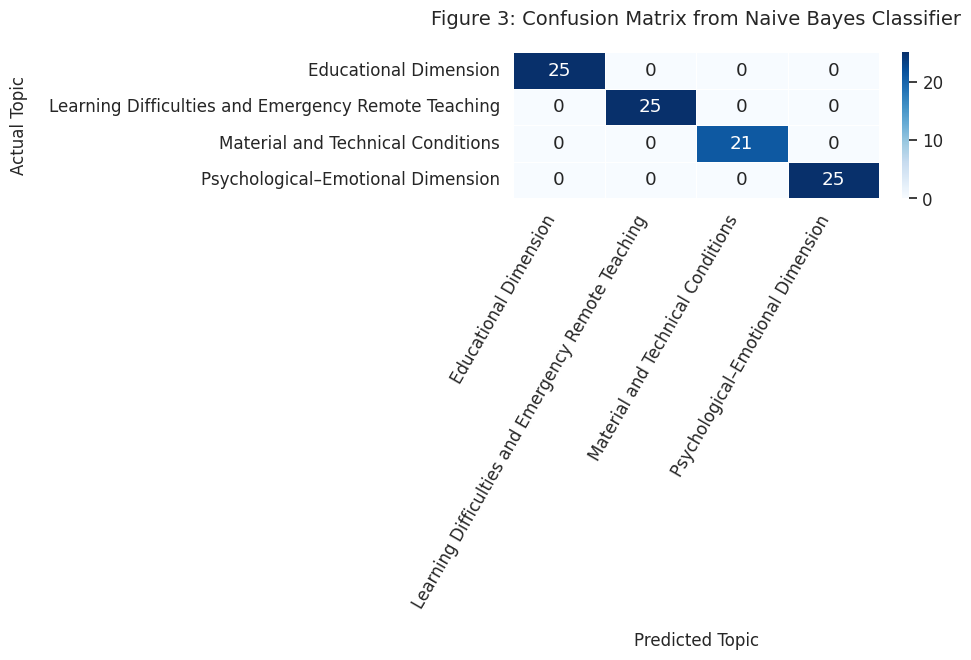

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

# Load dataset if not loaded
df = pd.read_csv("large_ERT_dataset_english.csv")

# Encode labels if not already done
if 'encoded_label' not in df.columns:
    df['encoded_label'] = df['label'].astype('category').cat.codes

label_names = df[['label', 'encoded_label']].drop_duplicates().sort_values('encoded_label')['label'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['encoded_label'], test_size=0.2, random_state=42)

# Vectorize text
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 1: Create Table 3 DataFrame from confusion matrix
table3_df = pd.DataFrame(
    cm,
    index=[f"Actual: {label}" for label in label_names],
    columns=[f"Predicted: {label}" for label in label_names]
)
print("Table 3: Confusion Matrix Counts\n")
display(table3_df)

# Step 2: Plot Figure 3 heatmap of confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_names,
    yticklabels=label_names,
    linewidths=0.5,
    linecolor='white',
    ax=ax
)
print("\n" + "-"*80 + "\n")

ax.set_title("Figure 3: Confusion Matrix from Naive Bayes Classifier", fontsize=14, pad=20)
ax.set_xlabel("Predicted Topic", fontsize=12, labelpad=15)
ax.set_ylabel("Actual Topic", fontsize=12, labelpad=15)
plt.xticks(rotation=60, ha='right')
plt.yticks(rotation=0)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()


table 4

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Load dataset
df = pd.read_csv("large_ERT_dataset_english.csv")

# Step 2: Encode labels
df['encoded_label'] = df['label'].astype('category').cat.codes
label_names = df[['label', 'encoded_label']].drop_duplicates().sort_values('encoded_label')['label'].values

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['encoded_label'], test_size=0.2, random_state=42)

# Step 4: Vectorize text
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Train model
model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

# Step 6: Generate classification report
report_dict = classification_report(y_test, y_pred, target_names=label_names, output_dict=True)
report_df = pd.DataFrame(report_dict).T

# Filter only the classes (not accuracy/avg) and round
table4_df = report_df.iloc[:len(label_names)][['precision', 'recall', 'f1-score']].round(2)
table4_df.index.name = 'Topic'
table4_df.reset_index(inplace=True)

# Step 7: Display as Table 4
print("Table 4: Model Performance per Topic\n")
display(table4_df)


Table 4: Model Performance per Topic



,Topic,precision,recall,f1-score
0,Educational Dimension,1.0,1.0,1.0
1,Learning Difficulties and Emergency Remote Tea...,1.0,1.0,1.0
2,Material and Technical Conditions,1.0,1.0,1.0
3,Psychological–Emotional Dimension,1.0,1.0,1.0


table 5

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Load dataset
df = pd.read_csv("large_ERT_dataset_english.csv")

# Step 2: Encode labels
df['encoded_label'] = df['label'].astype('category').cat.codes
label_names = df['label'].astype('category').cat.categories

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['encoded_label'], test_size=0.2, random_state=42)

# Step 4: Vectorize text
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Define and evaluate models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (LinearSVC)": LinearSVC()
}

results = []

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1-Score": round(f1, 3)
    })

# Step 6: Display Table 5
table5_df = pd.DataFrame(results)
print("Table 5: Overall Performance Metrics per Model\n")
display(table5_df)


Table 5: Overall Performance Metrics per Model



,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,1.0,1.0,1.0,1.0
1,Logistic Regression,1.0,1.0,1.0,1.0
2,SVM (LinearSVC),1.0,1.0,1.0,1.0


Table 6

In [ ]:
# Install necessary packages (run once)
!pip install -q transformers datasets scikit-learn torch

import os
os.environ["WANDB_DISABLED"] = "true"  # Disable WandB API prompts

import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("large_ERT_dataset_english.csv")
df['encoded_label'] = df['label'].astype('category').cat.codes
label_names = df['label'].astype('category').cat.categories
num_classes = len(label_names)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['encoded_label'], test_size=0.2, random_state=42
)

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased", num_labels=num_classes
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Tokenize and encode labels
def encode_batch(texts, labels):
    encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=128, return_tensors="pt")
    return encodings, torch.tensor(labels.values).long()

train_encodings, train_labels = encode_batch(X_train, y_train)
test_encodings, test_labels = encode_batch(X_test, y_test)

# Dataset class
class ERTDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}, self.labels[idx]

train_dataset = ERTDataset(train_encodings, train_labels)
test_dataset = ERTDataset(test_encodings, test_labels)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training loop
model.train()
epochs = 2
for epoch in range(epochs):
    total_loss = 0
    print(f"Epoch {epoch+1}/{epochs}")
    for batch in train_loader:
        inputs, labels = batch
        inputs = {k: v.to(device) for k, v in inputs.items()}
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Average loss: {avg_loss:.4f}")

# Evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        inputs = {k: v.to(device) for k, v in inputs.items()}
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=label_names))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
Average loss: 1.1918
Epoch 2/2
Average loss: 0.0534
Classification Report:

                                                     precision    recall  f1-score   support

                              Educational Dimension       1.00      1.00      1.00        25
Learning Difficulties and Emergency Remote Teaching       1.00      1.00      1.00        25
                  Material and Technical Conditions       1.00      1.00      1.00        21
                  Psychological–Emotional Dimension       1.00      1.00      1.00        25

                                           accuracy                           1.00        96
                                          macro avg       1.00      1.00      1.00        96
                                       weighted avg       1.00      1.00      1.00        96



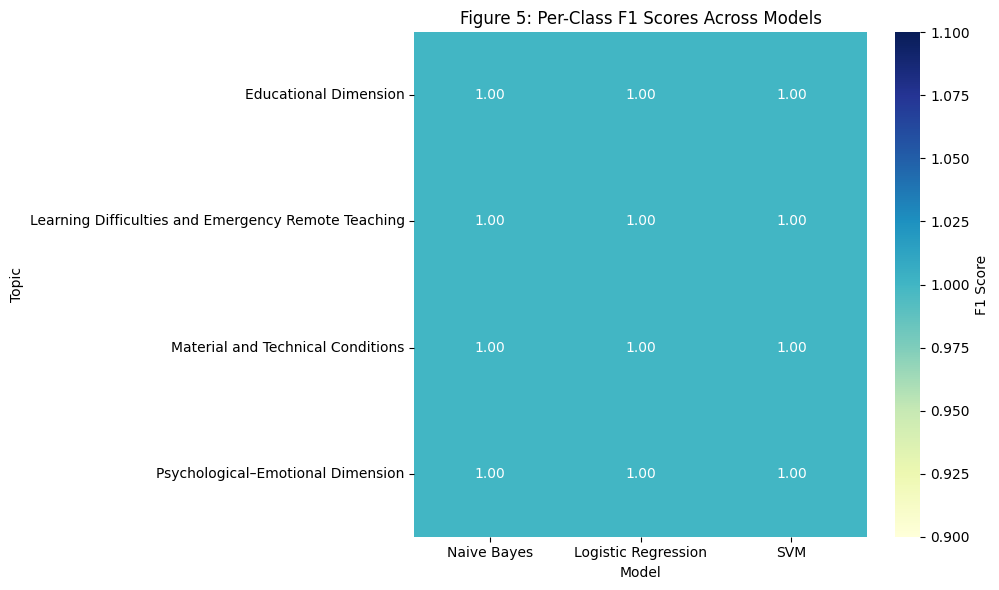

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv("large_ERT_dataset_english.csv")
df['encoded_label'] = df['label'].astype('category').cat.codes
label_names = df['label'].astype('category').cat.categories

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['encoded_label'], test_size=0.2, random_state=42)

# Vectorize text
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

# Collect per-class F1-scores for each model
f1_scores = {}

for model_name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    report = classification_report(y_test, y_pred, target_names=label_names, output_dict=True)
    # Extract f1-score per class
    f1_scores[model_name] = [report[label]['f1-score'] for label in label_names]

# Create DataFrame for heatmap
heatmap_df = pd.DataFrame(f1_scores, index=label_names)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'F1 Score'})
plt.title("Figure 5: Per-Class F1 Scores Across Models")
plt.ylabel("Topic")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=4)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrices for different models (replace with your own data)
conf_matrices = {
    "GreekBERT": [[45, 2, 3, 0], [1, 40, 5, 4], [2, 3, 50, 0], [0, 1, 2, 47]],
    "XGBoost": [[30, 10, 5, 5], [8, 25, 6, 11], [5, 8, 30, 7], [3, 6, 7, 34]],
    "SVM": [[38, 6, 4, 2], [3, 34, 8, 5], [6, 7, 40, 5], [2, 3, 5, 42]],
    "Logistic Regression": [[35, 8, 5, 2], [4, 30, 6, 10], [7, 5, 38, 8], [3, 4, 6, 37]]
}

class_names = ["Material/Technical", "Educational", "Psychological", "Learning Difficulties"]

def plot_confusion_matrix(matrix, model_name):
    cm_array = np.array(matrix)
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size for padding
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_array, display_labels=class_names)
    disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix: {model_name}", pad=20)
    plt.xticks(rotation=30, ha='right')
    plt.subplots_adjust(left=0.25, right=0.9, top=0.9, bottom=0.3)
    filename = f"conf_matrix_{model_name.replace(' ', '_')}_adjusted.png"
    plt.savefig(filename, dpi=300)
    plt.close()
    print(f"Saved: {filename}")

for model, matrix in conf_matrices.items():
    plot_confusion_matrix(matrix, model)


Saved: conf_matrix_GreekBERT_adjusted.png
Saved: conf_matrix_XGBoost_adjusted.png
Saved: conf_matrix_SVM_adjusted.png
Saved: conf_matrix_Logistic_Regression_adjusted.png
